In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0104/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 457 ms, sys: 9.11 ms, total: 466 ms
Wall time: 468 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.007945,0.0,-0.015862,0.0,-0.018728,0.00000,0.044334,0.000567,0.040543,...,0.00000,-0.011801,0.000000,-0.014348,0.000000e+00,-0.002540,0.0,0.001093,0.0,-0.006951
1,0.0,-0.007200,0.0,-0.014912,0.0,-0.008924,0.00000,0.015186,0.000000,0.036810,...,0.00000,-0.009357,0.000000,-0.013813,0.000000e+00,-0.000842,0.0,0.012773,0.0,-0.006390
2,0.0,-0.007708,0.0,-0.013195,0.0,-0.007611,0.00000,0.005452,0.000000,0.039282,...,0.00000,-0.008539,0.000000,-0.019973,0.000000e+00,-0.001503,0.0,0.010821,0.0,-0.007330
3,0.0,0.002253,0.0,-0.004648,0.0,0.013973,0.04368,0.011136,0.154138,0.033750,...,0.00000,0.000516,0.000000,-0.011991,0.000000e+00,0.006065,0.0,0.021181,0.0,-0.002116
4,0.0,-0.001194,0.0,-0.001524,0.0,0.001779,0.00000,0.007086,0.000000,0.028253,...,0.00194,-0.007728,0.033166,-0.008625,1.767040e-07,0.008750,0.0,-0.001592,0.0,-0.002587


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.000567,0.000107,0.0,0.0,0.0,0.0,...,2.140443e-09,0.00003,4.196664e-07,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,3.866841e-02,0.072474,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
3,0.0,0.0,0.0,0.04368,0.154138,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,4.196664e-07,0.00000,0.000000e+00,0.000000,0.0,0.00194,0.033166,1.767040e-07,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.00000,0.000000,0.000567,0.000107,0.0,0.0,0.0,0.0,...,2.140443e-09,0.00003,4.196665e-07,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
1,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
2,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,3.942576e-02,0.075165,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
3,0.0,0.0,0.00000,0.044648,0.166652,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
4,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,4.196665e-07,0.00000,0.000000e+00,0.000000,0.0,0.001942,0.033722,1.767040e-07,0.0,0.0
5,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
6,0.0,0.0,0.00002,0.000010,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    33.000000
1    30.000000
2    39.000001
3    40.000000
4    40.998810
5    42.169009
6    30.005317
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007945,-0.015862,-0.018728,0.044334,0.040543,-0.016620,-0.029504,-0.018610,-0.011476,-0.009544,...,-0.003992,0.009564,0.058431,-0.043394,0.007290,-0.011801,-0.014348,-0.002540,0.001093,-0.006951
1,-0.007200,-0.014912,-0.008924,0.015186,0.036810,-0.005158,-0.016010,-0.006474,-0.006307,-0.008970,...,-0.004620,0.009245,0.047644,-0.008851,0.002197,-0.009357,-0.013813,-0.000842,0.012773,-0.006390
2,-0.007708,-0.013195,-0.007611,0.005452,0.039282,0.003628,-0.020484,-0.003984,-0.000925,-0.000607,...,-0.003249,-0.000042,0.049702,0.006911,-0.005319,-0.008539,-0.019973,-0.001503,0.010821,-0.007330
3,0.002253,-0.004648,0.013973,0.011136,0.033750,-0.001457,-0.014991,0.003302,0.010211,0.001052,...,0.002342,-0.001892,0.016988,-0.009734,0.000506,0.000516,-0.011991,0.006065,0.021181,-0.002116
4,-0.001194,-0.001524,0.001779,0.007086,0.028253,-0.017477,-0.010164,-0.005257,0.008596,0.002096,...,0.000463,-0.005004,0.017485,-0.001547,0.000222,-0.007728,-0.008625,0.008750,-0.001592,-0.002587


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007914,-0.015737,-0.018554,0.045331,0.041376,-0.016483,-0.029073,-0.018438,-0.011410,-0.009499,...,-0.003984,0.009610,0.060172,-0.042466,0.007317,-0.011731,-0.014246,-0.002536,0.001094,-0.006927
1,-0.007174,-0.014801,-0.008884,0.015302,0.037496,-0.005144,-0.015882,-0.006453,-0.006287,-0.008930,...,-0.004610,0.009288,0.048797,-0.008812,0.002200,-0.009314,-0.013718,-0.000841,0.012855,-0.006370
2,-0.007678,-0.013108,-0.007582,0.005467,0.040064,0.003634,-0.020276,-0.003976,-0.000925,-0.000607,...,-0.003243,-0.000042,0.050958,0.006935,-0.005305,-0.008502,-0.019775,-0.001502,0.010880,-0.007303
3,0.002256,-0.004638,0.014071,0.011199,0.034326,-0.001456,-0.014879,0.003307,0.010263,0.001053,...,0.002345,-0.001890,0.017133,-0.009686,0.000506,0.000516,-0.011920,0.006083,0.021407,-0.002113
4,-0.001193,-0.001522,0.001780,0.007111,0.028656,-0.017325,-0.010112,-0.005244,0.008633,0.002098,...,0.000464,-0.004991,0.017638,-0.001545,0.000222,-0.007699,-0.008588,0.008788,-0.001590,-0.002584
5,-0.001130,0.000797,0.015069,0.020998,0.051419,-0.006183,-0.000981,0.002448,0.003167,0.000267,...,0.001339,-0.000260,0.025149,0.005564,-0.001697,-0.005889,0.000942,0.005485,0.001447,-0.001480
6,-0.003879,-0.000742,0.008669,0.022449,0.059394,-0.010022,-0.008907,-0.005724,0.003075,0.001393,...,-0.001812,-0.001956,0.013904,-0.015757,-0.008598,-0.015034,-0.003088,0.002914,0.005780,-0.001375


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.0,0.000000,0.045331,0.041376,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.009610,0.060172,0.000000,0.007317,0.000000,0.0,0.000000,0.001094,0.0
1,0.000000,0.0,0.000000,0.015302,0.037496,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.009288,0.048797,0.000000,0.002200,0.000000,0.0,0.000000,0.012855,0.0
2,0.000000,0.0,0.000000,0.005467,0.040064,0.003634,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.050958,0.006935,0.000000,0.000000,0.0,0.000000,0.010880,0.0
3,0.002256,0.0,0.014071,0.011199,0.034326,0.000000,0.0,0.003307,0.010263,0.001053,...,0.002345,0.000000,0.017133,0.000000,0.000506,0.000516,0.0,0.006083,0.021407,0.0
4,0.000000,0.0,0.001780,0.007111,0.028656,0.000000,0.0,0.000000,0.008633,0.002098,...,0.000464,0.000000,0.017638,0.000000,0.000222,0.000000,0.0,0.008788,0.000000,0.0


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    23.604889
1    24.514601
2    25.776722
3    21.536203
4    17.825255
5    24.983249
6    21.932268
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0104_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0104_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0104_true_and_forecasted_values_df

,True_count,Forecasted_count
0,33.000000,23.604889
1,30.000000,24.514601
2,39.000001,25.776722
3,40.000000,21.536203
4,40.998810,17.825255
5,42.169009,24.983249
6,30.005317,21.932268


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

14.792192637707764

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

13.571421435680353

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.17748264509167463, pvalue=0.7034191458534276)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-8.14192963790998

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 265 ms, sys: 68.1 ms, total: 333 ms
Wall time: 334 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-6.9734454e-03, -1.1769533e-03, -4.9453378e-03, ...,
         3.8968325e-03,  3.6108494e-03, -1.9340515e-03],
       [-6.9288611e-03,  1.0852814e-03, -3.8669705e-03, ...,
         3.1677485e-03,  3.7695169e-03, -2.0641685e-03],
       [-7.9401135e-03,  5.0306320e-05, -3.2243133e-03, ...,
         1.1930466e-03,  7.4172020e-04, -6.0194731e-04],
       ...,
       [-1.0349095e-02, -4.7357082e-03, -6.0933828e-03, ...,
         1.7271042e-03,  1.6076565e-03, -1.7045140e-03],
       [-1.1469364e-02, -5.7418942e-03, -7.0627928e-03, ...,
         8.3959103e-04,  2.8932095e-03, -2.3546815e-03],
       [-1.2019575e-02, -4.7009587e-03, -5.6349039e-03, ...,
         4.5537949e-05,  2.2990704e-03, -2.8059483e-03]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.1 ms, sys: 1.04 ms, total: 21.1 ms
Wall time: 20.5 ms


In [52]:
loaded_npy_files[0]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.8968325e-03,
        3.6108494e-03, 0.0000000e+00],
       [0.0000000e+00, 1.0852814e-03, 0.0000000e+00, ..., 3.1677485e-03,
        3.7695169e-03, 0.0000000e+00],
       [0.0000000e+00, 5.0306320e-05, 0.0000000e+00, ..., 1.1930466e-03,
        7.4172020e-04, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7271042e-03,
        1.6076565e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.3959103e-04,
        2.8932095e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.5537949e-05,
        2.2990704e-03, 0.0000000e+00]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[37.194775, 31.1536  , 34.59269 , ..., 24.43132 , 27.980143,
        25.937103],
       [33.398605, 29.738636, 29.409548, ..., 24.927368, 28.973152,
        33.38355 ],
       [32.798344, 30.526081, 34.47335 , ..., 26.928745, 32.58068 ,
        26.210096],
       ...,
       [26.229458, 34.162815, 33.419582, ..., 31.961384, 36.51775 ,
        38.378555],
       [30.641975, 30.480064, 43.751972, ..., 39.938717, 40.265812,
        35.66626 ],
       [28.554018, 33.560085, 43.355824, ..., 35.03486 , 40.627968,
        37.885807]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[37.194775, 31.1536  , 34.59269 , ..., 24.43132 , 27.980143,
        25.937103],
       [33.398605, 29.738636, 29.409548, ..., 24.927368, 28.973152,
        33.38355 ],
       [32.798344, 30.526081, 34.47335 , ..., 26.928745, 32.58068 ,
        26.210096],
       ...,
       [26.229458, 34.162815, 33.419582, ..., 31.961384, 36.51775 ,
        38.378555],
       [30.641975, 30.480064, 43.751972, ..., 39.938717, 40.265812,
        35.66626 ],
       [28.554018, 33.560085, 43.355824, ..., 35.03486 , 40.627968,
        37.885807]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[20.92055221],
       [20.55860538],
       [20.2693182 ],
       [17.22943697],
       [15.79766099],
       [20.3873601 ],
       [18.56729784]])

In [63]:
ui_train

array([[39.95142469],
       [40.36540985],
       [41.66616516],
       [38.46940498],
       [35.76462708],
       [42.26914701],
       [38.99360695]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

20.53565057686397

In [66]:
y_traina = block_0104_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[32.99999993],
       [29.99999992],
       [39.00000114],
       [39.9999999 ],
       [40.99881042],
       [42.16900878],
       [30.00531684]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([29.53146 , 29.504856, 30.581106, 27.891165, 24.564396, 30.5189  ,
       28.119635], dtype=float32)

In [71]:
sum_forecasted_values

0    23.604889
1    24.514601
2    25.776722
3    21.536203
4    17.825255
5    24.983249
6    21.932268
dtype: float64

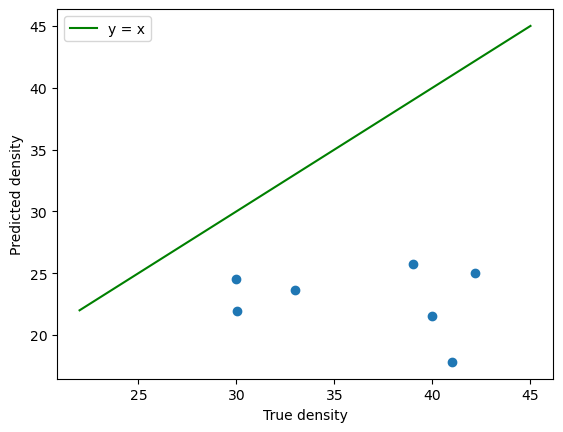

In [72]:
plt.scatter(block_0104_true_and_forecasted_values_df['True_count'], block_0104_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 45], [22, 45], color='green', label='y = x')
plt.legend()
plt.show()

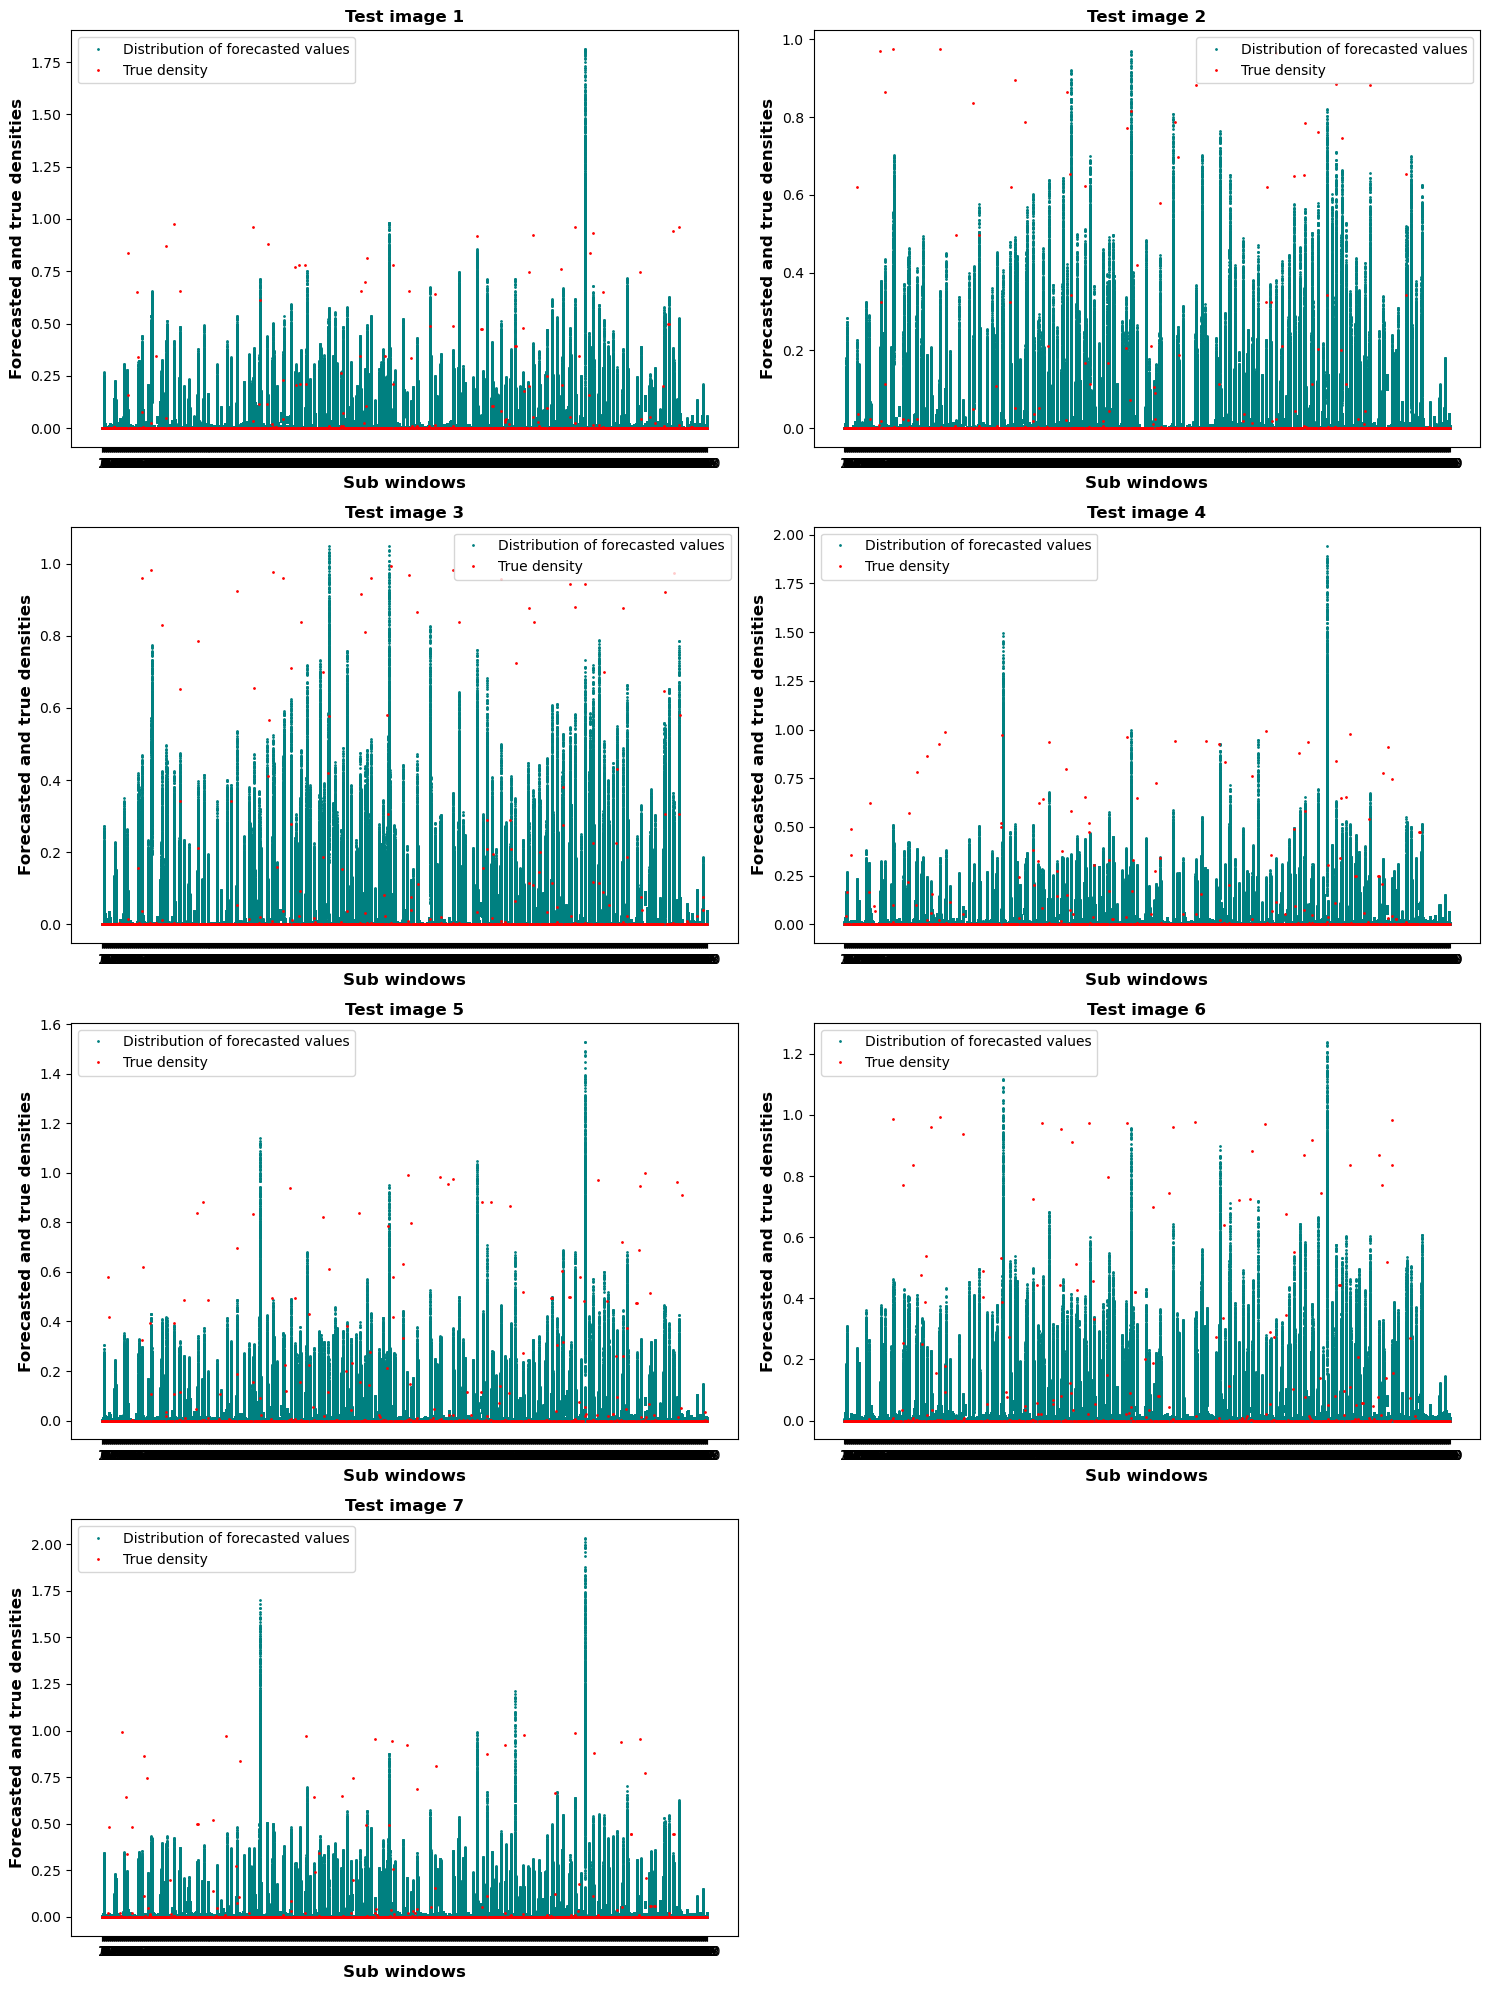

CPU times: user 32.1 s, sys: 984 ms, total: 33.1 s
Wall time: 32.8 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 